### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Carwling)이라 함
- requests와 beautifulsoup4 패키지 사용

### 1. 웹 문서 전체 가져오기
- urllib.request 패키지

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

html = urlopen("https://kin.naver.com/search/list.naver?query=%EC%9D%B4%ED%83%88%EB%A6%AC%EC%95%84+%EC%97%AC%ED%96%89")
soup = bs(html, "html.parser")
print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="이탈리아 여행의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var u

- requests 패키지

In [18]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import quote
from urllib.parse import unquote

ss=quote(input("검색어:"))
print(ss)
html = requests.get("https://kin.naver.com/search/list.naver?query="+ss)
soup = bs(html.text, "html.parser")
print(soup)

검색어:이탈리아 여행
%EC%9D%B4%ED%83%88%EB%A6%AC%EC%95%84%20%EC%97%AC%ED%96%89

<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="이탈리아 여행의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20220720141348/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "http

### 2. html 태그에서 원하는 정보 추출하기
- html 태그를 이용하는 방법
- CSS Selector를 이용하는 방버

#### html 태그: 
 * find("태그")-첫번째 태그만 검색
 * find_all("태그")-태그 전체를 검색(List로 반환)

In [21]:
# class를 이용한 태그 검색
find_div = soup.find("div", class_="group_nav")
find_div

# id를 이용한 태그 검색
find_div = soup.find('div', id="basic1")
find_div

In [24]:
# find_all 사용
find_div = soup.find("ul", class_="basic1")
find_lst = find_div.find_all("li")
list_link=[]
for item in find_lst:
    # print(item.get_text())   # 모든 태그를 제거하고 텍스트만 남김
    #print(item.text)         # 태그 내에 있는 텍스트를 추출
    a=item.find("a")["href"]  # 태그의 속성을 출력
    list_link.append(a)

In [25]:
list_link

['https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=418458021&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=2&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=422682275&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=3&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=403948345&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=4&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=292509240&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=5&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=297980119&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=6&search_sort=0&spq=0',
 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&do

In [ ]:
if "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0" in "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=1&search_sort=0&spq=0":
    print("")

In [ ]:
# https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0

In [32]:
if "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0"!="https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=1&search_sort=0&spq=0":
    print("not same")

not same


In [26]:
unquote("7J207YOI66as7JWEIOyXrO2WiQ")

'7J207YOI66as7JWEIOyXrO2WiQ'

In [6]:
###한페이지 크롤링

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url 
url="https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=410437936"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행
# print(soup)

#첫번째 답변
# div_tag1=soup.find_all("div",class_="c-heading__content")[0]
# print(div_tag1.text)

#1~4까지 답변
text_oui=[]
for i in range(5):
    div_tag2=soup.find_all("div",class_="_endContents c-heading-answer__content")[i]
    div_tag2=div_tag2.text
    div_tag2=div_tag2.replace("\n","")
    div_tag2=div_tag2.replace("\u200b","")
    text_oui.append(div_tag2)
    
print(text_oui)

['         저는 40대후반 직장인입니다. 아들이 중1인데 사춘기 접어들기전 좋은 추억을 만들고자 2022.5.24일부터 5.31일까지 이탈리아 로마인, 로마아웃으로 저, 와이프, 중1 아들 이렇게 셋이서 이탈리아 여행을 계획하고 있습니다.=> 짧은 일정에 최악의 인, 아웃을 잡아 버렸네요!!ㅎㅎ가족과 함께 처음으로 자유여행을 가게되었는데 이탈리아 정보가 너무 부족해서 자유여행 하는데 약간 두려움(?)이 있습니다. 5.24.(화) 12시 비행기로 이탈리아 로마로 들어갔다가 5.31.(화) 12시 비행기로 귀국할 예정인데 여행지, 숙박, 교통(렌트 포함) 등에 대해서 자세히 알려주시면 대단히 고맙겠습니다.=> 지금은 무리하면 다 놓칩니다.      처음부터 로마 인, 베네치아 또는 밀라노 아웃으로 잡았다면 문제가 없었겠으나      24일 12시 로마 도착이면 이날 여행도 어렵고, 마지막 날 12시 항공편이면 이날도 마찬가지에요. 지금은 큰 틀에서...1안 : 로마 + 아씨시 + 남부 투어 정도로 압축을 하거나~2안 : 로마 + 베네치아 다시 로마로 복귀 정도로 압축하는 게 맞을 듯합니다. 최소한 1 또는 2안 또는 제3의 대안이라도 제시를 해줘야 그것을 보고 좀더 세부적인 것을 논할 수 있습니다.지금은 경우의 수가 너무 많아서요~                알아두세요!위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요.2022.01.27.', '                             여행경비 줄이려면 아고다나 호텔스닷컴 할인코드가 가장 좋습니다.아래 자동적용되는 주소 알려드리니 꼭 활용해보세요.그냥 링크만 접속하면 알아서 최대 할인 숙박정보 보여줍니다.                    ▶ 아고다 할인코드 바로가기 [클릭] (최대 87%)아고다 할인코드도 따로 입력할 필요없이 위에 트래블링 제휴 페이지를 통해 접속하시면 자동으로 87% 최대 할인을 받으실 수 있답니다.               

#### CSS Selector

In [98]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib.parse import quote

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=%EC%9D%B4%ED%83%88%EB%A6%AC%EC%95%84+%EC%97%AC%ED%96%89"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") #밑에 문단 전체 하나
# print(ul_soup)
# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li") #왜 0번째?

# print(len(li_soup))

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    # print(title)
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
#     # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
    a=li.find("a")["href"] #find_all이면 여러개중에 맨 위의 것 가져오기 때문에 [0]해야됌, 그래서 그냥 find
#     print(a)
    nav_kin.append({"제목":title, "등록일":date, "요약":doct,"링크":a})


    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df
#댓글 열 추가, 내용가져와서 빈도수, 텍스트 마이닝

links=["https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=1&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=418458021&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=2&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=422682275&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=3&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=403948345&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=4&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=292509240&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=5&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=297980119&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=6&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=413161595&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=7&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=401817572&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=8&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=415328397&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=9&search_sort=0&spq=0","https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=422170625&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=10&search_sort=0&spq=0"]
txt=[]
for idx,ls in enumerate(links):
    html = urlopen(ls)
    soup = bs(html, "html.parser")
    try:
        a=soup.find("div",class_="_endContents c-heading-answer__content")
        a=a.get_text()
        a=a.replace("\n","")
        a=a.replace("\t","")
        a=a.replace("\u200b","")
        txt.append(a)
    except:
        txt.append("")
# print(txt)

df["내용"]=txt
df.to_csv("contents.csv")

In [ ]:
###네이버api url 연결해서 가져온 links
# <a href="https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=421153950&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=1&search_sort=0&spq=0"
# a href="https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=418458021&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=2&search_sort=0&spq=0" 
# "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=422682275&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=3&search_sort=0&spq=0
# https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=403948345&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=4&search_sort=0&spq=0
# https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=292509240&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=5&search_sort=0&spq=0
# https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=297980119&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=6&search_sort=0&spq=0

In [ ]:
#4개추가
# "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=413161595&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=7&search_sort=0&spq=0"
# "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=401817572&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=8&search_sort=0&spq=0"
# "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=415328397&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=9&search_sort=0&spq=0"
# "https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020304&docId=422170625&qb=7J207YOI66as7JWEIOyXrO2WiQ==&enc=utf8&section=kin&rank=10&search_sort=0&spq=0"

In [73]:
# pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [74]:
from nltk.tokenize import RegexpTokenizer # 정규식 표현에 의한 데이터 전처리 함수
from nltk import Text
import matplotlib.pyplot as plt

In [95]:
###konlpy 전체내용 -> 단어내용 가능
txt=[]
for i in df.내용:
    txt.append(i)

txt = ', '.join(txt)
regTok = RegexpTokenizer("[\w]+") # [0-9a-zA-Z ], 영문/숫자를 제외한 나머지 글자 제거
tokText=Text(regTok.tokenize(txt))
print(tokText)
print(type(tokText))

<Text: 안녕하세요 7월에 이탈리아 여행을갑니다6월 1일부터 입국할때 백신접종서류가 필요하지않다고...>
<class 'nltk.text.Text'>


In [92]:
###konlpy 첫번째 내용 -> 한음절로 가능
txt=df.내용[0]

txt = ', '.join(txt)
regTok = RegexpTokenizer("[\w]+") # [0-9a-zA-Z ], 영문/숫자를 제외한 나머지 글자 제거
tokText=Text(regTok.tokenize(txt))
print(tokText)
print(type(tokText))

<Text: 안 녕 하 세 요 7 월 에...>
<class 'nltk.text.Text'>


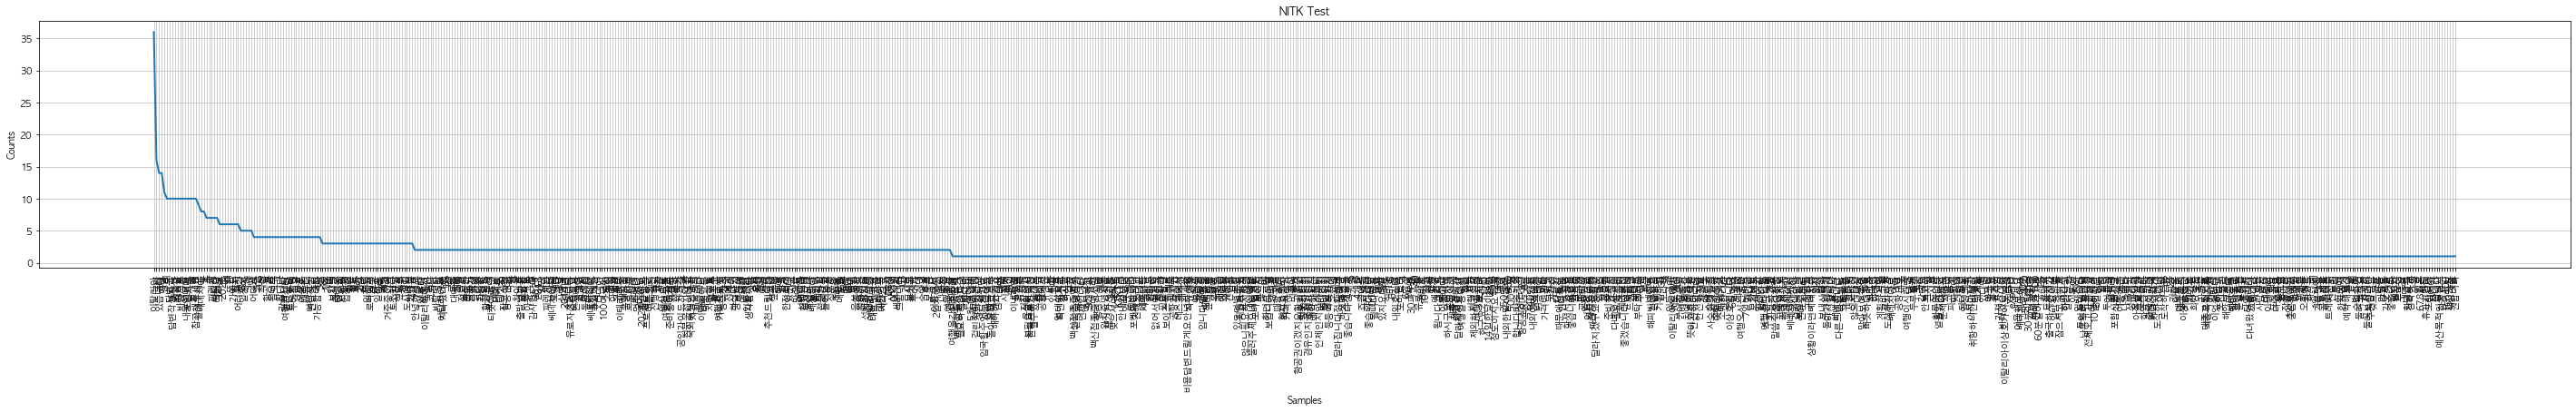

In [87]:
#plt.figure(figsize=(14, 5))
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

plt.rcParams['figure.figsize']=(50, 5)  # plt의 속성 수정(계속 사용 가능)
plt.title('NlTK Test')
tokText.plot()
plt.show()

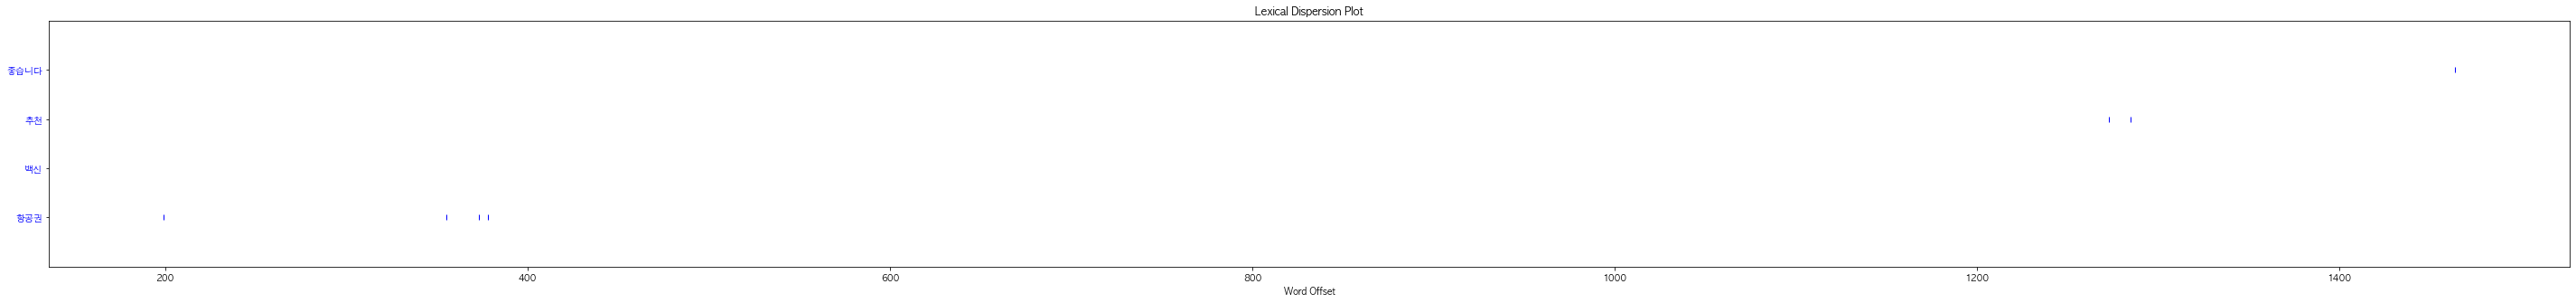

In [89]:
tokText.dispersion_plot(["좋습니다", '추천', '백신', '항공권'])  # 문장에서 단어의 위치값을 확인하고자 할때

In [99]:
from collections import Counter #데이터의 개수를 정리할 수 있는 모듈
from konlpy.tag import Kkma #형태소 분석기 호출
from konlpy.utils import pprint #유니코드 문자 출력
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용

In [149]:
new = pd.read_csv("contents.csv")
kkma = Kkma()
nouns_list=[] #nouns_list생성 
for item in new['내용'][:100]: #[ ]안의 숫자에 따라 분석 단어 개수 변화
    sentence_list = kkma.sentences(item)
#     print(sentence_list)
    for sentence in sentence_list:
        nouns = kkma.pos(sentence) #sentence의 형태소 분석
        for pos in nouns:
            if pos[1] == 'NNG' or pos[1] == 'NNP': #일반 명사와 고유 명사일 경우
                nouns_list+=[pos[0]] #nouns_list에 추가
                


In [151]:
new = pd.read_csv("contents.csv")
kkma = Kkma()
verbs_list=[] #nouns_list생성 
for item in new['내용'][:100]: #[ ]안의 숫자에 따라 분석 단어 개수 변화
    sentence_list = kkma.sentences(item)
#     print(sentence_list)
    for sentence in sentence_list:
        nouns = kkma.pos(sentence) #sentence의 형태소 분석
        for pos in nouns:
            print(pos)
            if pos[1] == 'VV': #일반 명사와 고유 명사일 경우
                verbs_list+=[pos[0]] #nouns_list에 추가
                

('안녕', 'NNG')
('하', 'XSV')
('세요', 'EFN')
('7', 'NR')
('월', 'NNM')
('에', 'JKM')
('이탈리아', 'NNP')
('여행', 'NNG')
('을', 'JKO')
('갈', 'VV')
('ㅂ니다', 'EFN')
('6', 'NR')
('월', 'NNM')
('1', 'NR')
('일', 'NNM')
('부터', 'JX')
('입국', 'NNG')
('하', 'XSV')
('ㄹ', 'ETD')
('때', 'NNG')
('백신', 'NNG')
('접종', 'NNG')
('서류', 'NNG')
('가', 'JKS')
('필요', 'NNG')
('하', 'XSV')
('지', 'ECD')
('않', 'VXV')
('다고', 'EFN')
('듣', 'VV')
('었', 'EPT')
('는데', 'ECD')
('맞', 'VV')
('나요', 'EFQ')
('?', 'SF')
('=', 'SW')
('>', 'SS')
('맞', 'VV')
('아요', 'EFN')
('.', 'SF')
('5', 'NR')
('월', 'NNM')
('11', 'NR')
('일', 'NNM')
('에', 'JKM')
('코로나', 'NNG')
('에', 'JKM')
('걸리', 'VV')
('ㄴ', 'ETD')
('적이', 'MAG')
('있', 'VV')
('는데', 'ECD')
('상관없', 'VA')
('나요', 'EFQ')
('?', 'SF')
('여권', 'NNG')
('만', 'JX')
('있', 'VV')
('으면', 'ECD')
('입국', 'NNG')
('하', 'XSV')
('ㄹ', 'ETD')
('수', 'NNB')
('있', 'VV')
('는', 'ETD')
('것', 'NNB')
('이', 'VCP')
('ㄴ가요', 'EFQ')
('?', 'SF')
('=', 'SW')
('>', 'SS')
('상관없', 'VA')
('어요', 'EFN')
('.', 'SF')
('그리', 'VV')
('고', 'ECE')
('이

In [154]:
stopword=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바',
          '거의', '것', '것과 같이', '것들', '게다가', '게우다', '이탈리아', '일정', '답변', '여행', '겨우', '견지에서',
          '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다',
          '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '', '그때', '그래',
          '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉',
          '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '', '그렇지 않으면', '그렇지만', '그렇지않으면',
          '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여',
          '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', 
          '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', 
          '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', 
          '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', 
          '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '', '된이상', 
          '두번째로', '둘', '둥둥', '뒤따라', '뒤이어', '든간에', '들', '등', '등등', '딩동', '따라', '따라서', '따위', 
          '따지지 않다', '딱', '때', '때가 되어', '때문에', '또', '또한', '뚝뚝', '라 해도', '령', '로', '로 인하여', 
          '로부터', '로써', '륙', '를', '마음대로', '마저', '마저도', '마치', '막론하고', '만 못하다', '만약', '만약에', 
          '만은 아니다', '만이 아니다', '만일', '만큼', '말하자면', '말할것도 없고', '매', '매번', '메쓰겁다', '몇', '모', 
          '모두', '무렵', '무릎쓰고', '무슨', '무엇', '무엇때문에', '물론', '및', '바꾸어말하면', '바꾸어말하자면', '바꾸어서 말하면',
          '바꾸어서 한다면', '바꿔 말하면', '바로', '바와같이', '밖에 안된다', '반대로', '반대로 말하자면', '반드시', '버금', '보는데서',
          '보다더', '보드득', '본대로', '봐', '봐', '부류의 사람들', '부터', '불구하고', '불문하고', '붕붕', '비걱거리다', '비교적',
          '비길수 없다', '비로소', '비록', '비슷하다', '비추어 보아', '비하면', '뿐만 아니라', '뿐만아니라', '뿐이다', '삐걱',
          '삐걱거리다', '사', '삼', '상대적으로 말하자면', '생각한대로', '설령', '설마', '설사', '셋', '소생', '소인', '솨',
          '쉿', '습니까', '습니다', '시각', '시간', '시작하여', '시초에', '시키다', '실로', '심지어', '아', '아니', '아니나다를가',
          '아니라면', '아니면', '아니었다면', '아래윗', '아무거나', '아무도', '아야', '아울러', '아이', '아이고', '아이구', '아이야',
          '아이쿠', '아하', '아홉', '안 그러면', '않기 위하여', '않기 위해서', '알 수 있다', '알았어', '앗', '앞에서', '앞의것', '야',
          '약간', '양자', '어', '어기여차', '어느', '어느 년도', '어느것', '어느곳', '어느때', '어느쪽', '어느해', '어디', '어때',
          '어떠한', '어떤', '어떤것', '어떤것들', '어떻게', '어떻해', '어이', '어째서', '어쨋든', '어쩔수 없다', '어찌', '어찌됏든',
          '어찌됏어', '어찌하든지', '어찌하여', '언제', '언젠가', '얼마', '얼마 안 되는 것', '얼마간', '얼마나', '얼마든지', '얼마만큼',
          '얼마큼', '엉엉', '에', '에 가서', '에 달려 있다', '에 대해', '에 있다', '에 한하다', '에게', '에서', '여', '여기', '여덟',
          '여러분', '여보시오', '여부', '여섯', '여전히', '여차', '연관되다', '연이서', '영', '영차', '옆사람', '예', '예를 들면',
          '예를 들자면', '예컨대', '예하면', '오', '오로지', '오르다', '오자마자', '오직', '오호', '오히려', '와', '와 같은 사람들',
          '와르르', '와아', '왜', '왜냐하면', '외에도', '요만큼', '요만한 것', '요만한걸', '요컨대', '우르르', '우리', '우리들',
          '우선', '우에 종합한것과같이', '운운', '월', '위에서 서술한바와같이', '위하여', '위해서', '윙윙', '육', '으로', '으로 인하여',
          '으로서', '으로써', '을', '응', '응당', '의', '의거하여', '의지하여', '의해', '의해되다', '의해서', '이', '이 되다',
          '이 때문에', '이 밖에', '이 외에', '이 정도의', '이것', '이곳', '이때', '이라면', '이래', '이러이러하다', '이러한', '이런',
          '이럴정도로', '이렇게 많은 것', '이렇게되면', '이렇게말하자면', '이렇구나', '이로 인하여', '이르기까지', '이리하여', '이만큼',
          '이번', '이봐', '이상', '이어서', '이었다', '이와 같다', '이와 같은', '이와 반대로', '이와같다면', '이외에도', '이용하여',
          '이유만으로', '이젠', '이지만', '이쪽', '이천구', '이천육', '이천칠', '이천팔', '인 듯하다', '인젠', '일', '일것이다',
          '일곱', '일단', '일때', '일반적으로', '일지라도', '임에 틀림없다', '입각하여', '입장에서', '잇따라', '있다', '자', '자기',
          '자기집', '자마자', '자신', '잠깐', '잠시', '저', '저것', '저것만큼', '저기', '저쪽', '저희', '전부', '전자', '전후',
          '점에서 보아', '정도에 이르다', '제', '제각기', '제외하고', '조금', '조차', '조차도', '졸졸', '좀', '좋아', '좍좍',
          '주룩주룩', '주저하지 않고', '줄은 몰랏다', '줄은모른다', '중에서', '중의하나', '즈음하여', '즉', '즉시', '지든지',
          '지만', '지말고', '진짜로', '쪽으로', '차라리', '참', '참나', '첫번째로', '쳇', '총적으로', '총적으로 말하면',
          '총적으로 보면', '칠', '콸콸', '쾅쾅', '쿵', '타다', '타인', '탕탕', '토하다', '통하여', '툭', '퉤', '틈타',
          '팍', '팔', '퍽', '펄렁', '하', '하게될것이다', '하게하다', '하겠는가', '하고 있다', '하고있었다', '하곤하였다',
          '하구나', '하기 때문에', '하기 위하여', '하기는한데', '하기만 하면', '하기보다는', '하기에', '하나', '하느니',
          '하는 김에', '하는 편이 낫다', '하는것도', '하는것만 못하다', '하는것이 낫다', '하는바', '하더라도', '하도다', 
          '하도록시키다', '하도록하다', '하든지', '하려고하다', '하마터면', '하면 할수록', '하면된다', '하면서', '하물며', 
          '하여금', '하여야', '하자마자', '하지 않는다면', '하지 않도록', '하지마', '하지마라', '하지만', '하하', '한 까닭에', 
          '한 이유는', '한 후', '한다면', '한다면 몰라도', '한데', '한마디', '한적이있다', '한켠으로는', '한항목', '할 따름이다', 
          '할 생각이다', '할 줄 안다', '할 지경이다', '할 힘이 있다', '할때', '할만하다', '할망정', '할뿐', '할수있다', '할수있어', 
          '할줄알다', '할지라도', '할지언정', '함께', '해도된다', '해도좋다', '해봐요', '해서는 안된다', '해야한다', '해요', '했어요', 
          '향하다', '향하여', '향해서', '허', '허걱', '허허', '헉', '헉헉', '헐떡헐떡', '형식으로 쓰여', '혹시', '혹은', '혼자', 
          '훨씬', '휘익', '휴', '흐흐', '흥', '힘입어']

for word in nouns_list:
#     print(word)
    if word in stopword:
        nouns_list.remove(word)
        
# count = Counter(nouns_list) #list 내 항목명과 항목별 개수
count = Counter(verbs_list) #list 내 항목명과 항목별 개수

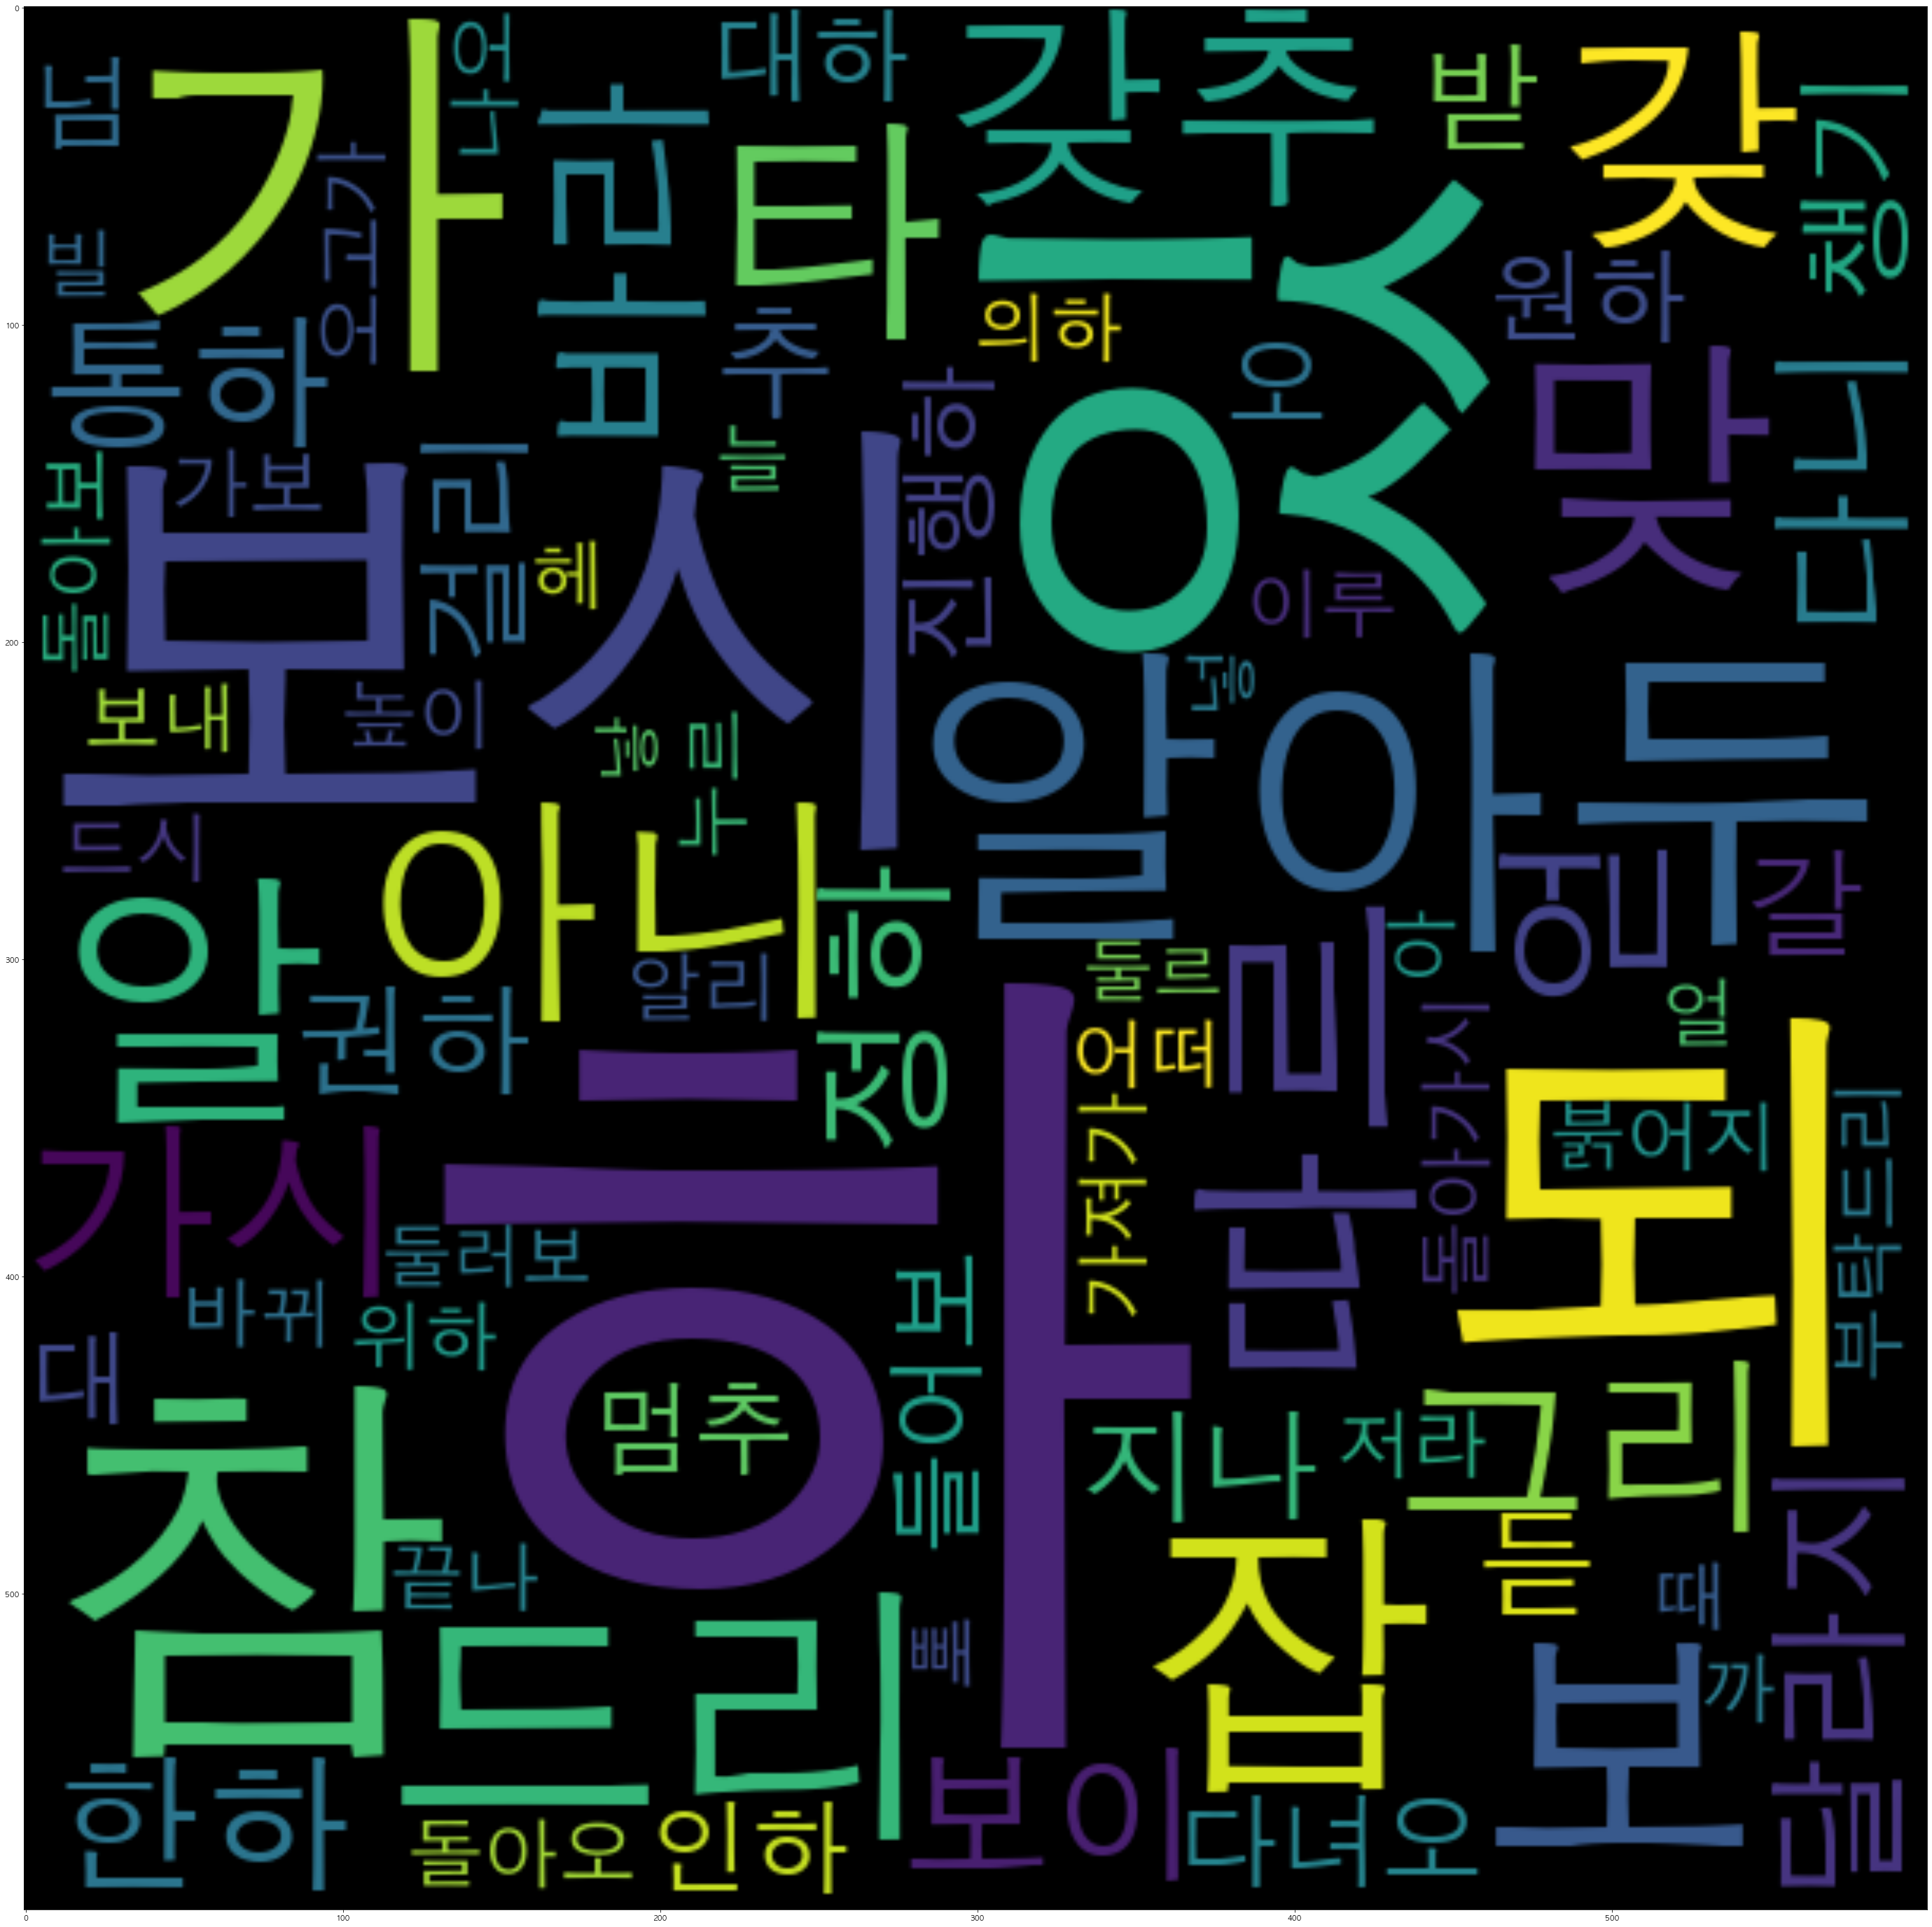

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt #그래프 그리기


wordcloud = WordCloud(width = 600,height = 600, font_path="AppleGothic")
wordcloud = wordcloud.generate_from_frequencies(count) #단어 출현 빈도에 따라 크기 변화

array = wordcloud.to_array()
fig = plt.figure(figsize=(50, 50))
plt.imshow(array, interpolation="bilinear")
plt.show() #word cloud 도출

#### [크롤링 연습]
- 네이버 지식인에서 "선릉역"으로 검색후 검색결과에서 첫번쩨 데이터 가져오기

In [156]:
import requests
from bs4 import BeautifulSoup as bs

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=%EA%B0%95%EB%82%A8%EC%97%AD+%EC%98%B7"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

# 검색된 li에서 원하는 텍스트 크롤링(추출)
print(li_soup[0].find("dt").get_text())  # 제목
print(li_soup[0].find("dd").get_text())  # 날짜
print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text())  # 요약 내용
print(li_soup[0].find_all("dd")[1].get_text()) #요약 내용



강남역 옷가게 선택 하는거 도와주세요

2021.12.27.
... 여성스러운 옷 좋아해서 그런 쪽으로 강남역 옷가게 추천해주시면 감사하겠습니당  강남역 옷가게 가실거면 그레이스유에서 운영하는 쇼룸가보세요!! 원래 온라인에서만... 
... 여성스러운 옷 좋아해서 그런 쪽으로 강남역 옷가게 추천해주시면 감사하겠습니당  강남역 옷가게 가실거면 그레이스유에서 운영하는 쇼룸가보세요!! 원래 온라인에서만... 


### [미션] 1페이지 검색 결과에서 전체 내용 가져오기
- 제목, 등록일, 요약 부분을 각각 가져와 DataFrame으로 저장

In [157]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=%EA%B0%95%EB%82%A8%EC%97%AD+%EC%98%B7"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

,제목,등록일,요약
0,강남역 옷가게 선택 하는거 도와주세요,2021.12.27.,... 여성스러운 옷 좋아해서 그런 쪽으로 강남역 옷가게 추천해주시면 감사하겠습니당...
1,강남역 지하상가 옷가게 영업시간,2022.02.02.,강남역 지하상가 옷가게 영업시간 언제부터... ◈ 강남역 지하쇼핑센터 운영시간 안내...
2,강남역 옷가게 빈프라임이 몇 번 출구...,2021.08.26.,강남역 빈프라임 가는 길을 좀 자세히 설명해 주세요.내가 길치다 강남역 11번 출구...
3,강남역 옷가게 추천!!,2020.05.10.,강남역에 있는 예쁜 옷가게 알려주세요~!! 빈티지샵 느낌이면 더 좋구 샤랄라한......
4,강남역 옷가게,2017.11.22.,제가 코트가 지금 당장 필요해서 마침 강남역... 말고요) 강남역 11번출구 쪽으...
5,강남역 옷가게,2020.02.06.,강남역에갈일있어서 거기서 옷 살 려는데 ... 브랜드좀 있는 옷가게 있나요?스포츠브...
6,강남역 내일처음가는건데 남자 옷가게,2019.09.15.,강남역 내일처음가는건데 남자 옷가게 많나요?그리고 고등학생인데 돈은 10만원이면 충...
7,신분당선 강남역 옷 사진,2020.01.31.,2020년 1월 31일에 강남역 신분당선 쪽에서 옷 사진 찍어도 되냐고 물어보고 사...
8,수원역하고 강남역중에 어디가 더 옷...,2022.06.01.,수원역하고 강남역중에 어디가 더 옷 사기 좋나요? 강남역입니다
9,강남역 옷가게,2016.12.08.,강남역에서 옷살까 생각ㅂ중이에요 옷이나 코트들 가격대좀 알려주세요 코트랑 옷 살 생...


### 3. 검색어를 이용한 크롤링
- urllib 패키지의 parse 모듈

In [158]:
# parse 모듈 사용법
from urllib import parse

text = "선릉역"

# 사람의 언어를 컴퓨터 언어로 인코딩
enc = parse.quote(text)  
print(enc)

# 컴퓨터 언어를 사람이 알아볼 수 있는 상태로 디코딩
dec = parse.unquote("%EC%84%A0%EB%A6%89%EC%97%AD") 
print(dec)

%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [159]:
import requests
from urllib import parse
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text=input("검색어 입력: ")

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=" + parse.quote(text) + "&page=1"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

검색어 입력: 강남역 옷


,제목,등록일,요약
0,강남역 옷가게 선택 하는거 도와주세요,2021.12.27.,... 여성스러운 옷 좋아해서 그런 쪽으로 강남역 옷가게 추천해주시면 감사하겠습니당...
1,강남역 지하상가 옷가게 영업시간,2022.02.02.,강남역 지하상가 옷가게 영업시간 언제부터... ◈ 강남역 지하쇼핑센터 운영시간 안내...
2,강남역 옷가게 빈프라임이 몇 번 출구...,2021.08.26.,강남역 빈프라임 가는 길을 좀 자세히 설명해 주세요.내가 길치다 강남역 11번 출구...
3,강남역 옷가게 추천!!,2020.05.10.,강남역에 있는 예쁜 옷가게 알려주세요~!! 빈티지샵 느낌이면 더 좋구 샤랄라한......
4,강남역 옷가게,2017.11.22.,제가 코트가 지금 당장 필요해서 마침 강남역... 말고요) 강남역 11번출구 쪽으...
5,강남역 옷가게,2020.02.06.,강남역에갈일있어서 거기서 옷 살 려는데 ... 브랜드좀 있는 옷가게 있나요?스포츠브...
6,강남역 내일처음가는건데 남자 옷가게,2019.09.15.,강남역 내일처음가는건데 남자 옷가게 많나요?그리고 고등학생인데 돈은 10만원이면 충...
7,신분당선 강남역 옷 사진,2020.01.31.,2020년 1월 31일에 강남역 신분당선 쪽에서 옷 사진 찍어도 되냐고 물어보고 사...
8,수원역하고 강남역중에 어디가 더 옷...,2022.06.01.,수원역하고 강남역중에 어디가 더 옷 사기 좋나요? 강남역입니다
9,강남역 옷가게,2016.12.08.,강남역에서 옷살까 생각ㅂ중이에요 옷이나 코트들 가격대좀 알려주세요 코트랑 옷 살 생...


### 4. 검색된 내용 전체(페이지 이동)
- 네이버 지식에서 검색어에 대한 10페이지까지 데이터 가져오기

In [160]:
import requests
from urllib import parse
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text=input("검색어 입력: ")
nav_kin = []

for page in range(1, 11):
    # 크롤링 대상 url 
    url = "https://kin.naver.com/search/list.naver?query=" + parse.quote(text)
    url = url + "&page="+str(page)

    html = requests.get(url)   # url에서 데이터 요청
    soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

    # css를 이용한 태그 검색
    ul_soup=soup.select("#s_content > div.section > ul") 

    # 검색된 태그에서 다시 li 전체를 검색
    li_soup=ul_soup[0].find_all("li")

    for li in li_soup:
        title = li.find("dt").get_text().replace("\n", "")
        date = li.find_all("dd")[0].get_text()
        doct = li.find_all("dd")[1].get_text()
        # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
        nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

검색어 입력: 강남역 옷


,제목,등록일,요약
0,강남역 옷가게 선택 하는거 도와주세요,2021.12.27.,... 여성스러운 옷 좋아해서 그런 쪽으로 강남역 옷가게 추천해주시면 감사하겠습니당...
1,강남역 지하상가 옷가게 영업시간,2022.02.02.,강남역 지하상가 옷가게 영업시간 언제부터... ◈ 강남역 지하쇼핑센터 운영시간 안내...
2,강남역 옷가게 빈프라임이 몇 번 출구...,2021.08.26.,강남역 빈프라임 가는 길을 좀 자세히 설명해 주세요.내가 길치다 강남역 11번 출구...
3,강남역 옷가게 추천!!,2020.05.10.,강남역에 있는 예쁜 옷가게 알려주세요~!! 빈티지샵 느낌이면 더 좋구 샤랄라한......
4,강남역 옷가게,2017.11.22.,제가 코트가 지금 당장 필요해서 마침 강남역... 말고요) 강남역 11번출구 쪽으...
...,...,...,...
95,강남역지히상가와 서울버스타미널지하상...,2013.02.20.,이제대학신입생이라서옷을사러가려구하는데 강남역지히상가와... 어디가더저렴하고이쁜옷이많...
96,강남역에 이런 구두 파는 가게 있나요...,2021.12.13.,... 그리고 브랜디 말고 저런 구두 하루배송되는 옷사이트 있으면 알려주세요 ㅠㅠㅠ...
97,강남역지하상가에서 옷을 샀는데 직원이,2019.02.20.,강남역지하상가에서 옷을 샀는데 직원이 사이즈를 잘못줬어요 지금 이미 집에와서 내일이...
98,강남역 데이트고스좀 알려주세요,2005.11.08.,... 강남역아니믄 안간다네여..;;멀어서 귀찮타그..ㅜㅜ 이름이랑 위치좀 좀 자세...
